In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file="datingdataset.csv"

df= pd.read_csv(file)
dd= pd.DataFrame(df)

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

{'w1_ppage': 'age_1', 'w1_ppeduc': 'education_1', 'w1_ppgender':'gender_1',
                  'w2_ppage':'age_2', 'w2_ppeduc':'education_2', 'w2_ppgender':'gender_2',
                  'w3_ppage':'age_3', 'w3_ppeduc':'education_3', 'w3_ppgender':'gender_3', 
                  'w1_q4':'p_gender_1', 'w1_q9':'p_age_1', 'w1_q10':'p_education_1', 
                  'w2_Q4': 'p_gender_2', 'w2_Q9':'p_age_2', 'w2_Q10':'p_education_2',
                  'w3_Q4':'p_gender_3', 'w3_Q9':'p_age_3', 'w3_Q10':'p_education_3'}

columns_to_print = ['caseid_new','w1_ppage','w1_ppeduc','w1_ppgender','w2_ppage','w2_ppeduc','w2_ppgender','w3_ppage','w3_ppeduc','w3_ppgender'
                   , 'w1_q4','w1_q9','w1_q10', 'w2_Q4', 'w2_Q9','w2_Q10', 'w3_Q4','w3_Q9','w3_Q10']

columns=['caseid_new', 'w1_ppeduc', 'w1_q10']



In [27]:

filtered_df = df['w1_ppeduc'] == 2
df.loc[filtered_df,columns]



,caseid_new,w1_ppeduc,w1_q10
746,1741457,2,5
887,1828581,2,2
2124,2473595,2,2


w1_ppeduc  w1_q10
1                     2
           1          1
           2          2
           4          1
           9          1
                     ..
14         12        46
           13        38
           14        33
           7          1
           9          2
Length: 141, dtype: int64
w1_ppeduc  w1_q10
1                     2
           1          1
           2          2
           4          1
           9          1
                     ..
14         12        46
           13        38
           14        33
           7          1
           9          2
Length: 141, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


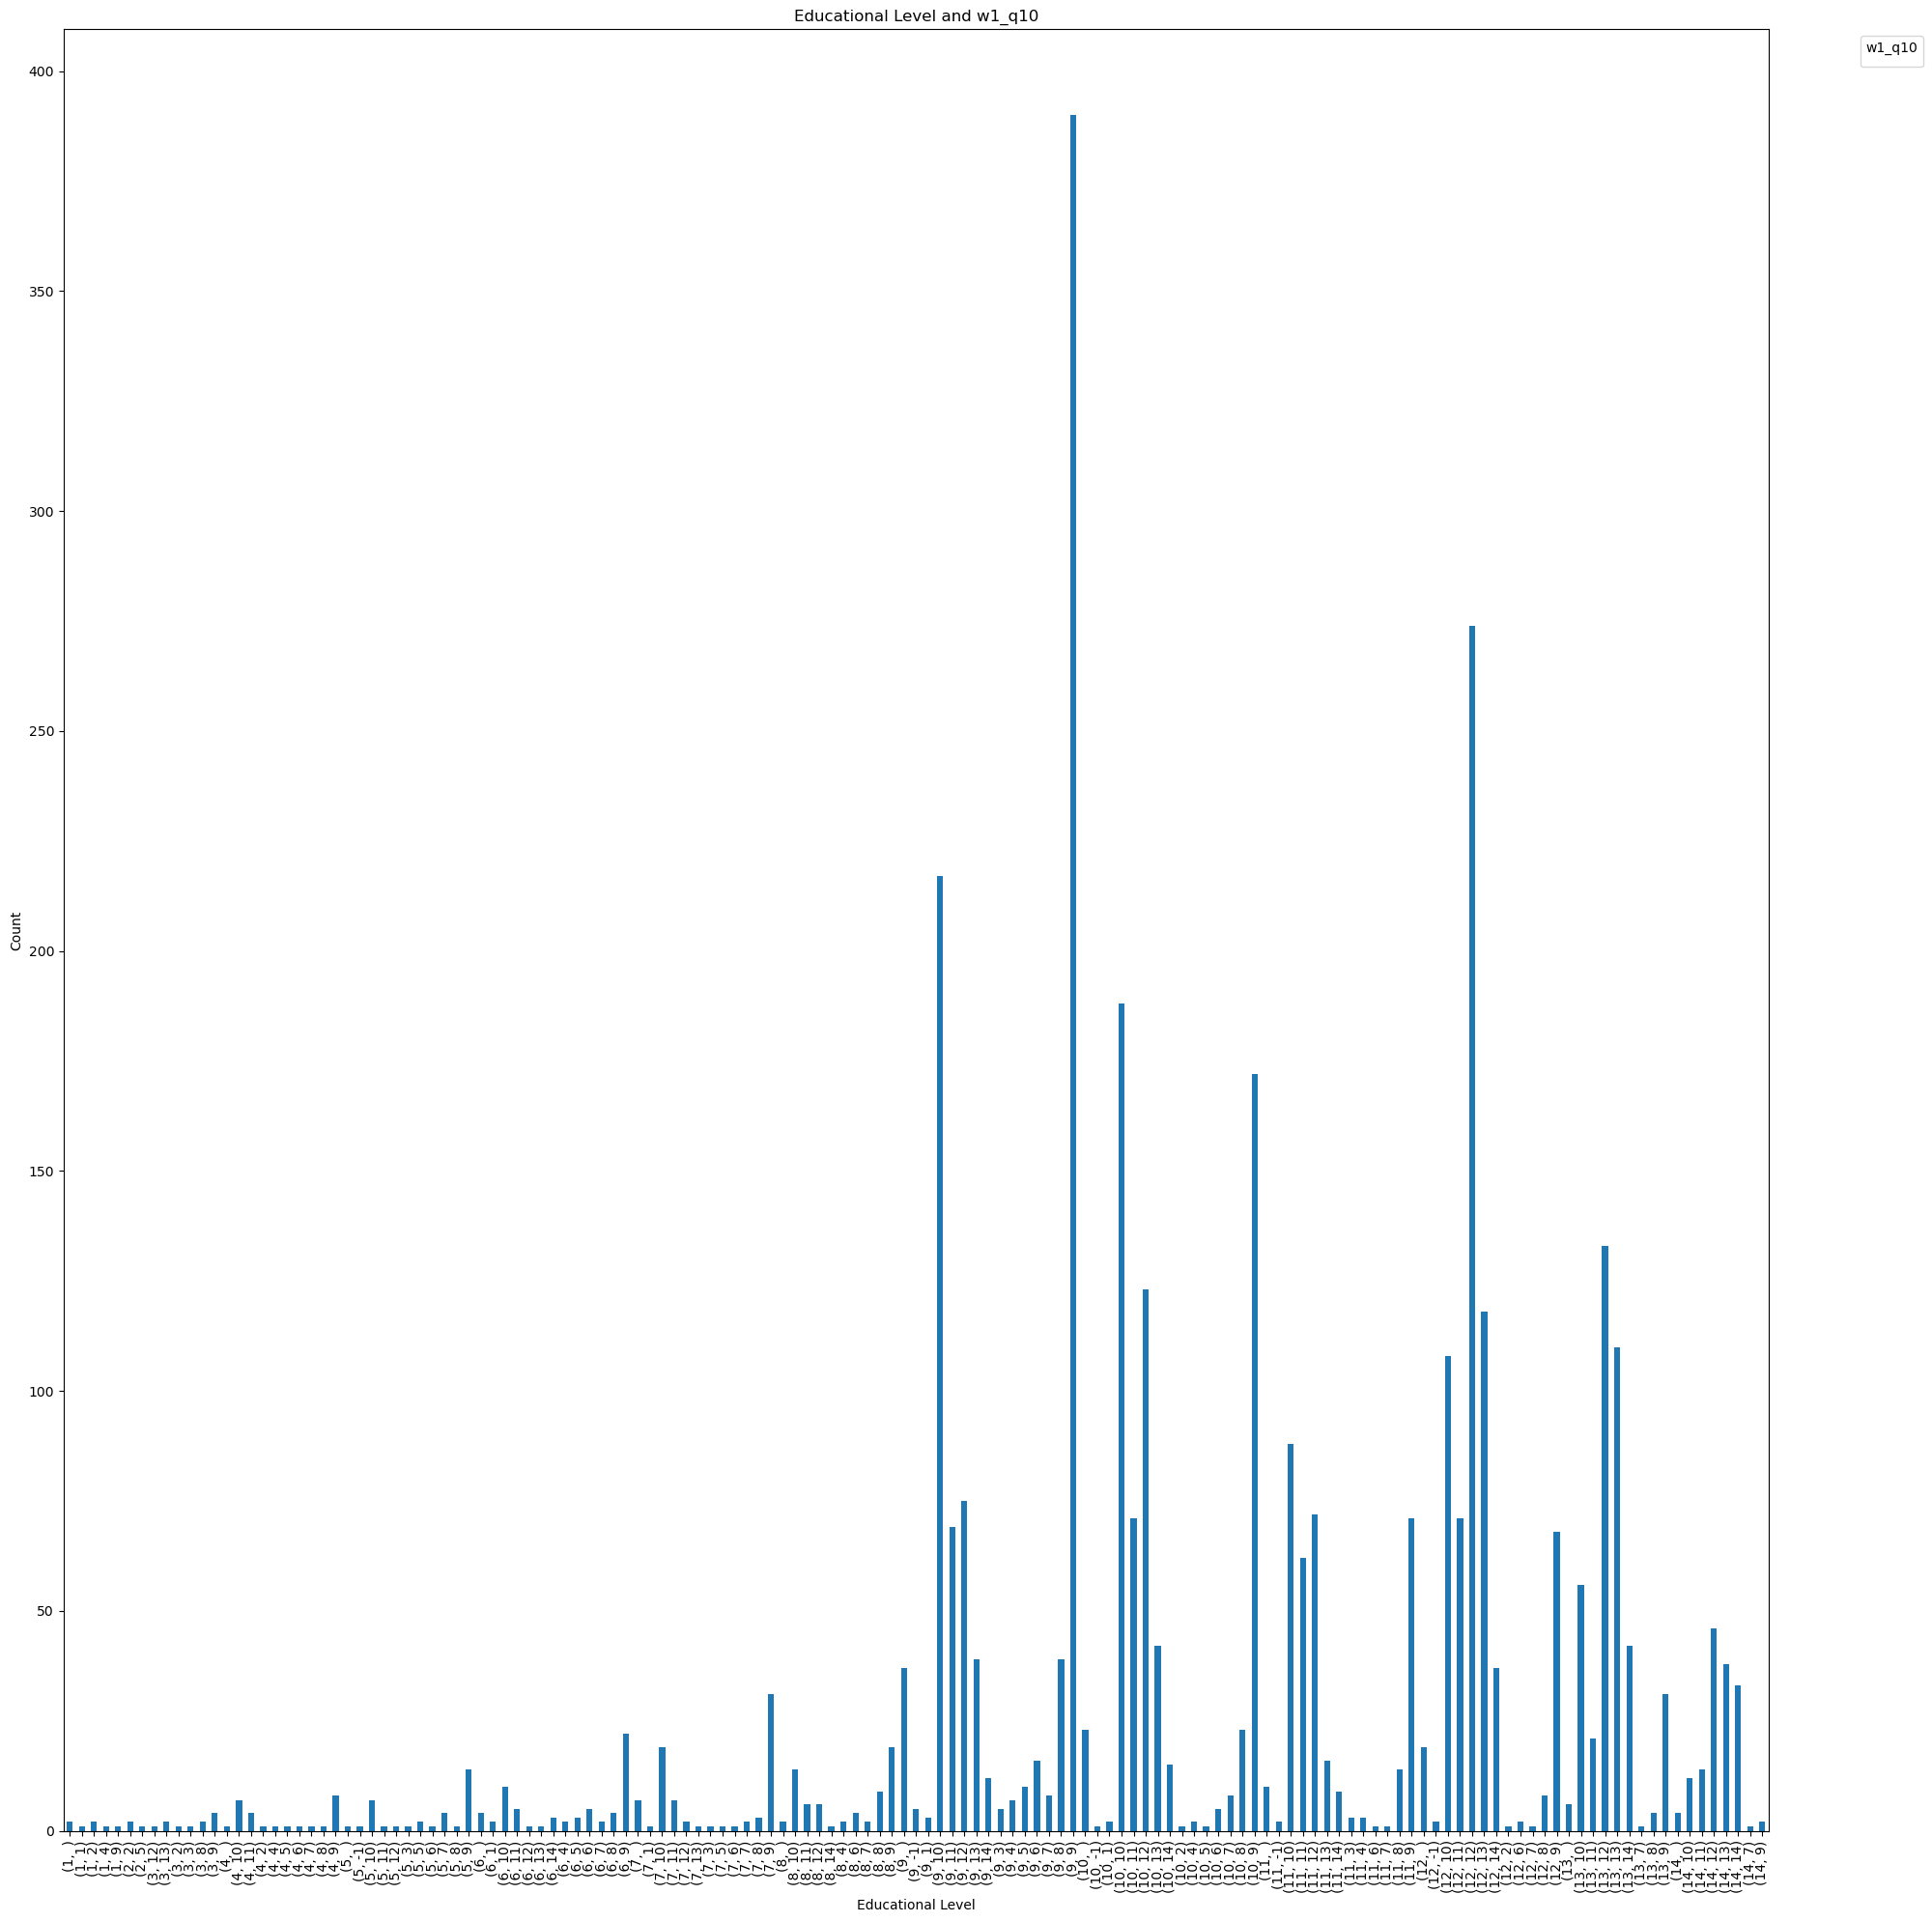

In [6]:
#hypothesis: more educated daters are less likely to contact less educated people 
#we proved using this that majority of people having at least a high school degree went for people with equal or higher educational 
#level compared to them using stats from wave 1
#CONSIDERING THIS - hypothesis proved

#group by their educational level and their partner's educational level in wave 1
educational_level = dd.groupby(['w1_ppeduc','w1_q10']).size()
print(educational_level)

#display results where count is greater than 50 to know if a greater proportion of people support the hypothesis
filtered_groups = educational_level[educational_level > 0]
print(filtered_groups)

#educational_level.to_csv('education.csv')

plt.figure(figsize=(20, 20))
filtered_groups.plot(kind='bar', stacked=True)
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.title('Educational Level and w1_q10')
plt.legend(title='w1_q10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


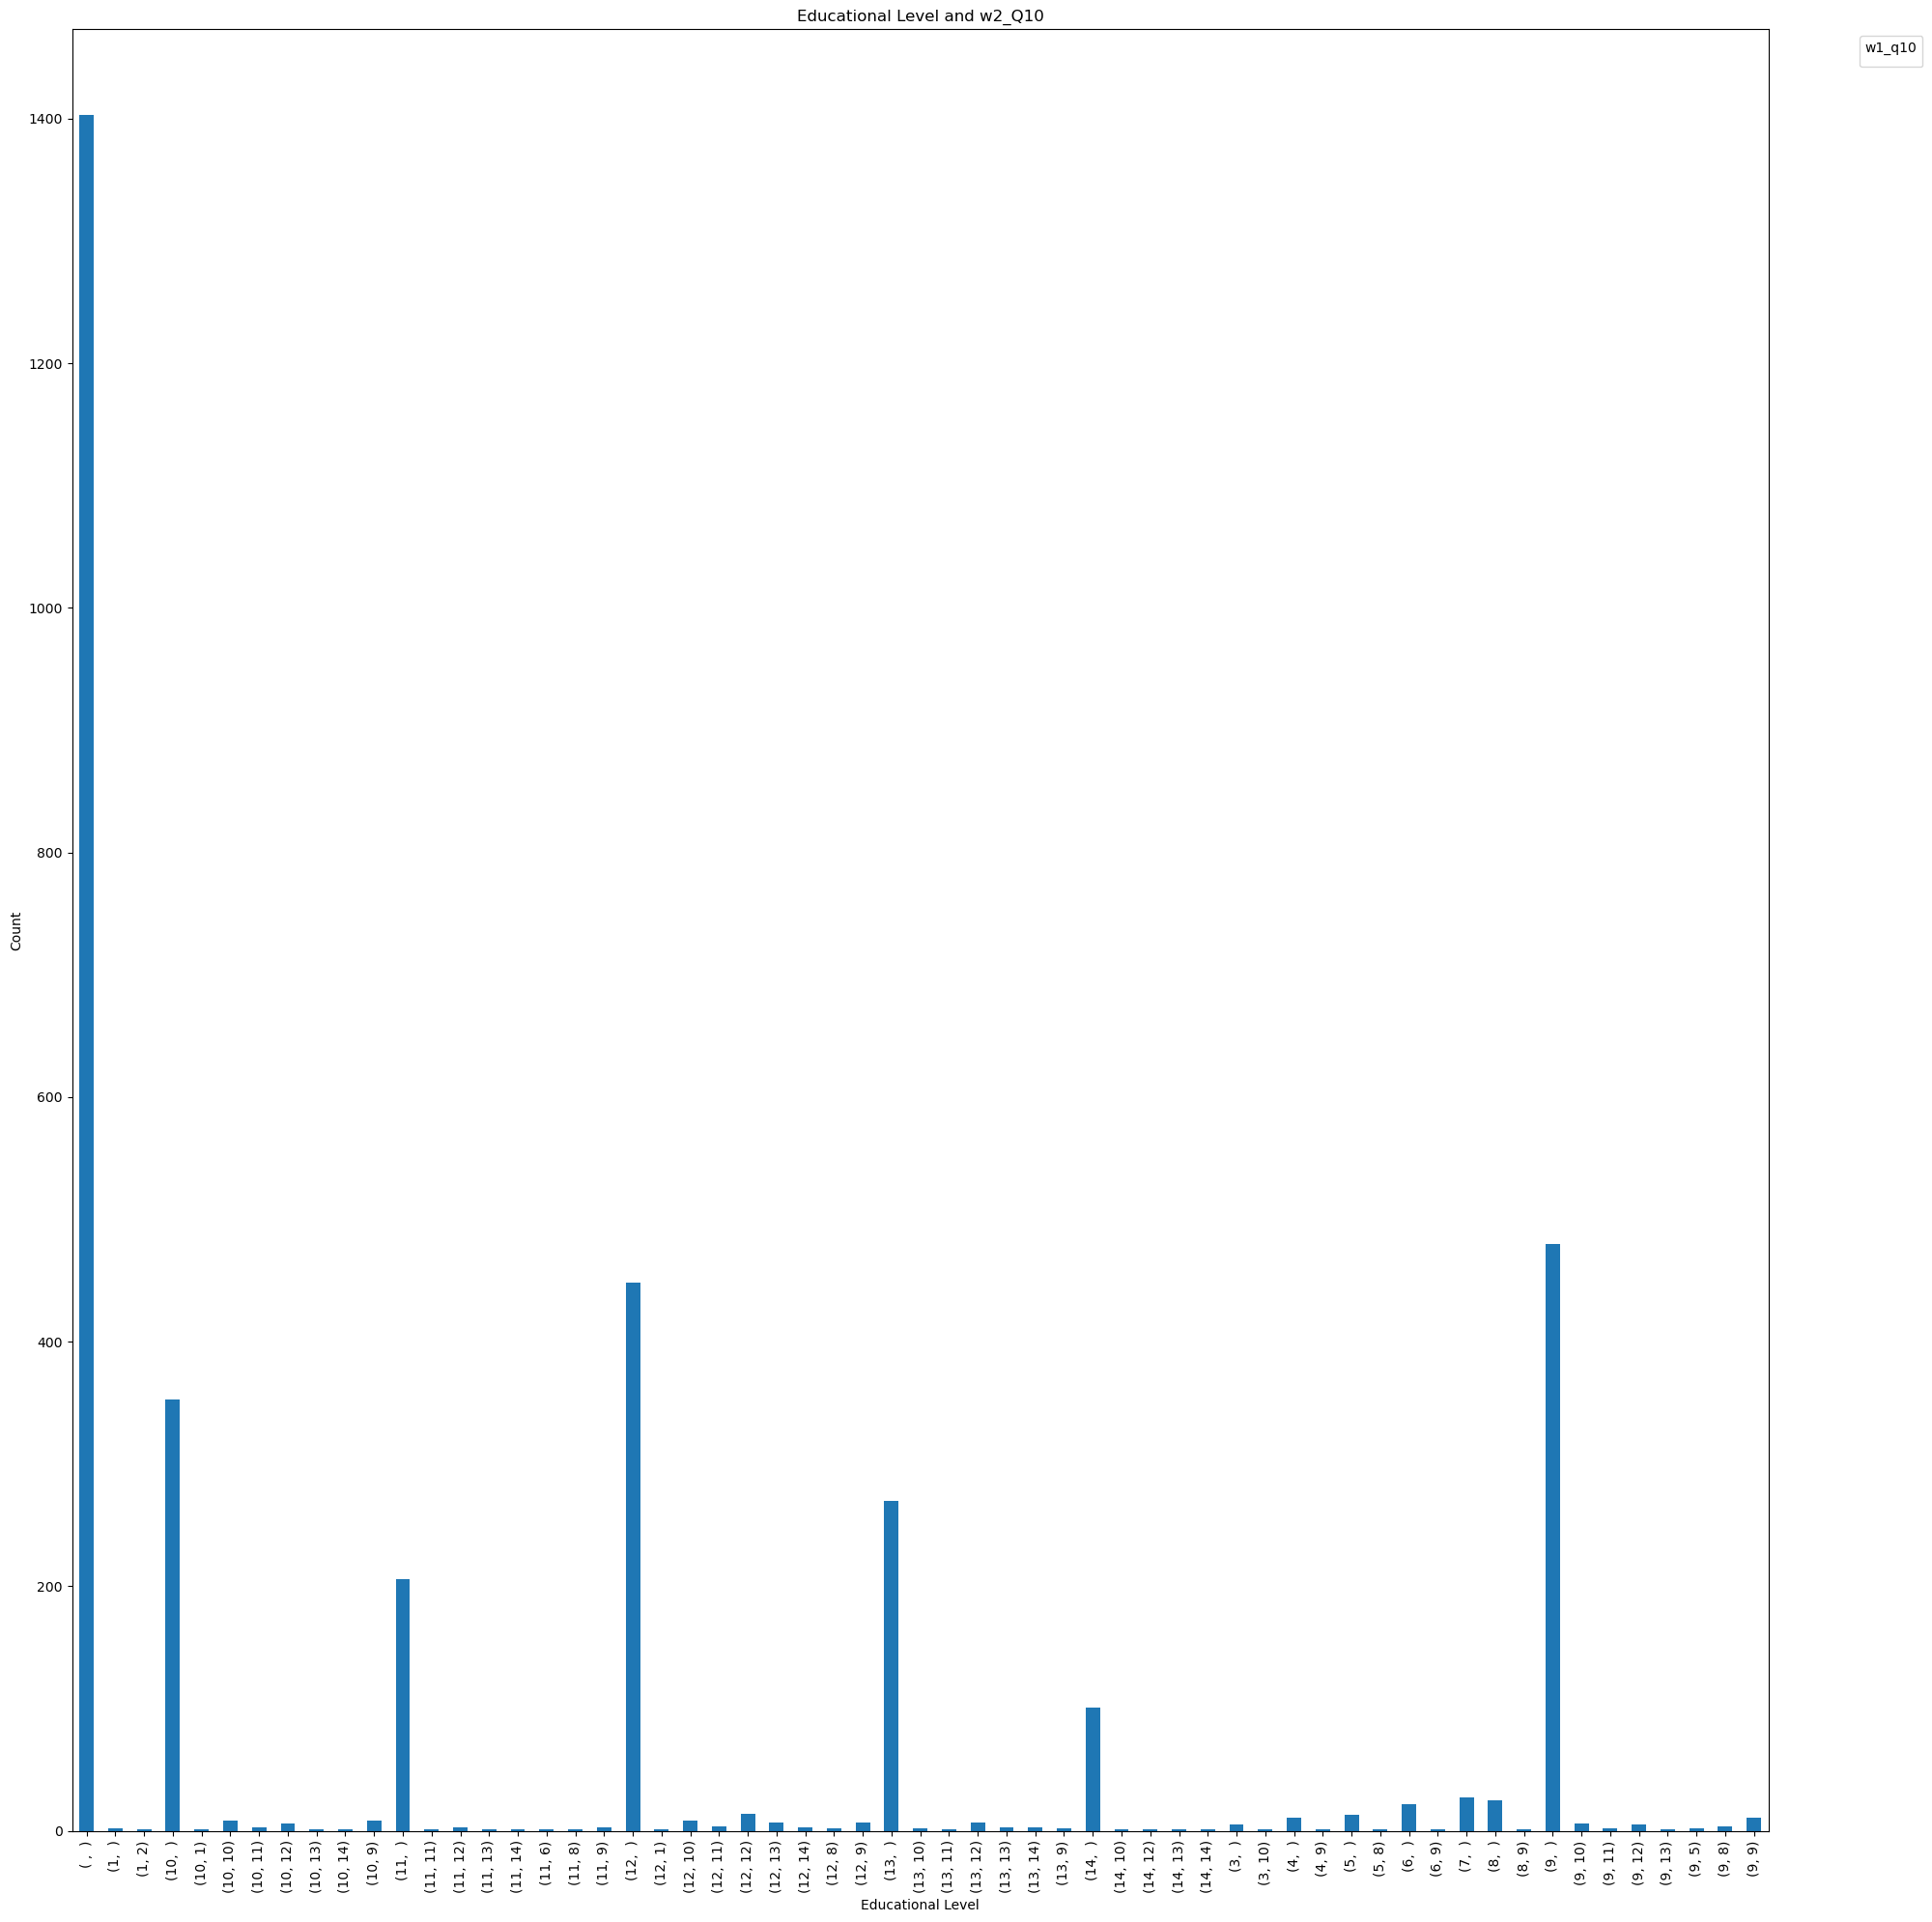

In [10]:
#to prove: more educated online daters are less likely to contact less educated people 
#we proved using this that majority of people having at least a high school degree went for people with equal or higher educational 
#level compared to them 
#wave 2

#group by their educational level and their partner's educational level in wave 2
educational_level = dd.groupby(['w2_ppeduc','w2_Q10']).size()
#print(educational_level)

#display results where count is greater than 50 to know if a greater proportion of people support the hypothesis
filtered_groups = educational_level[educational_level > 0]
#print(filtered_groups)

educational_level.to_csv('education_w2.csv')

plt.figure(figsize=(20, 20))
educational_level.plot(kind='bar', stacked=True)
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.title('Educational Level and w2_Q10')
plt.legend(title='w1_q10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#not considering this since there is a lot of empty responses 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


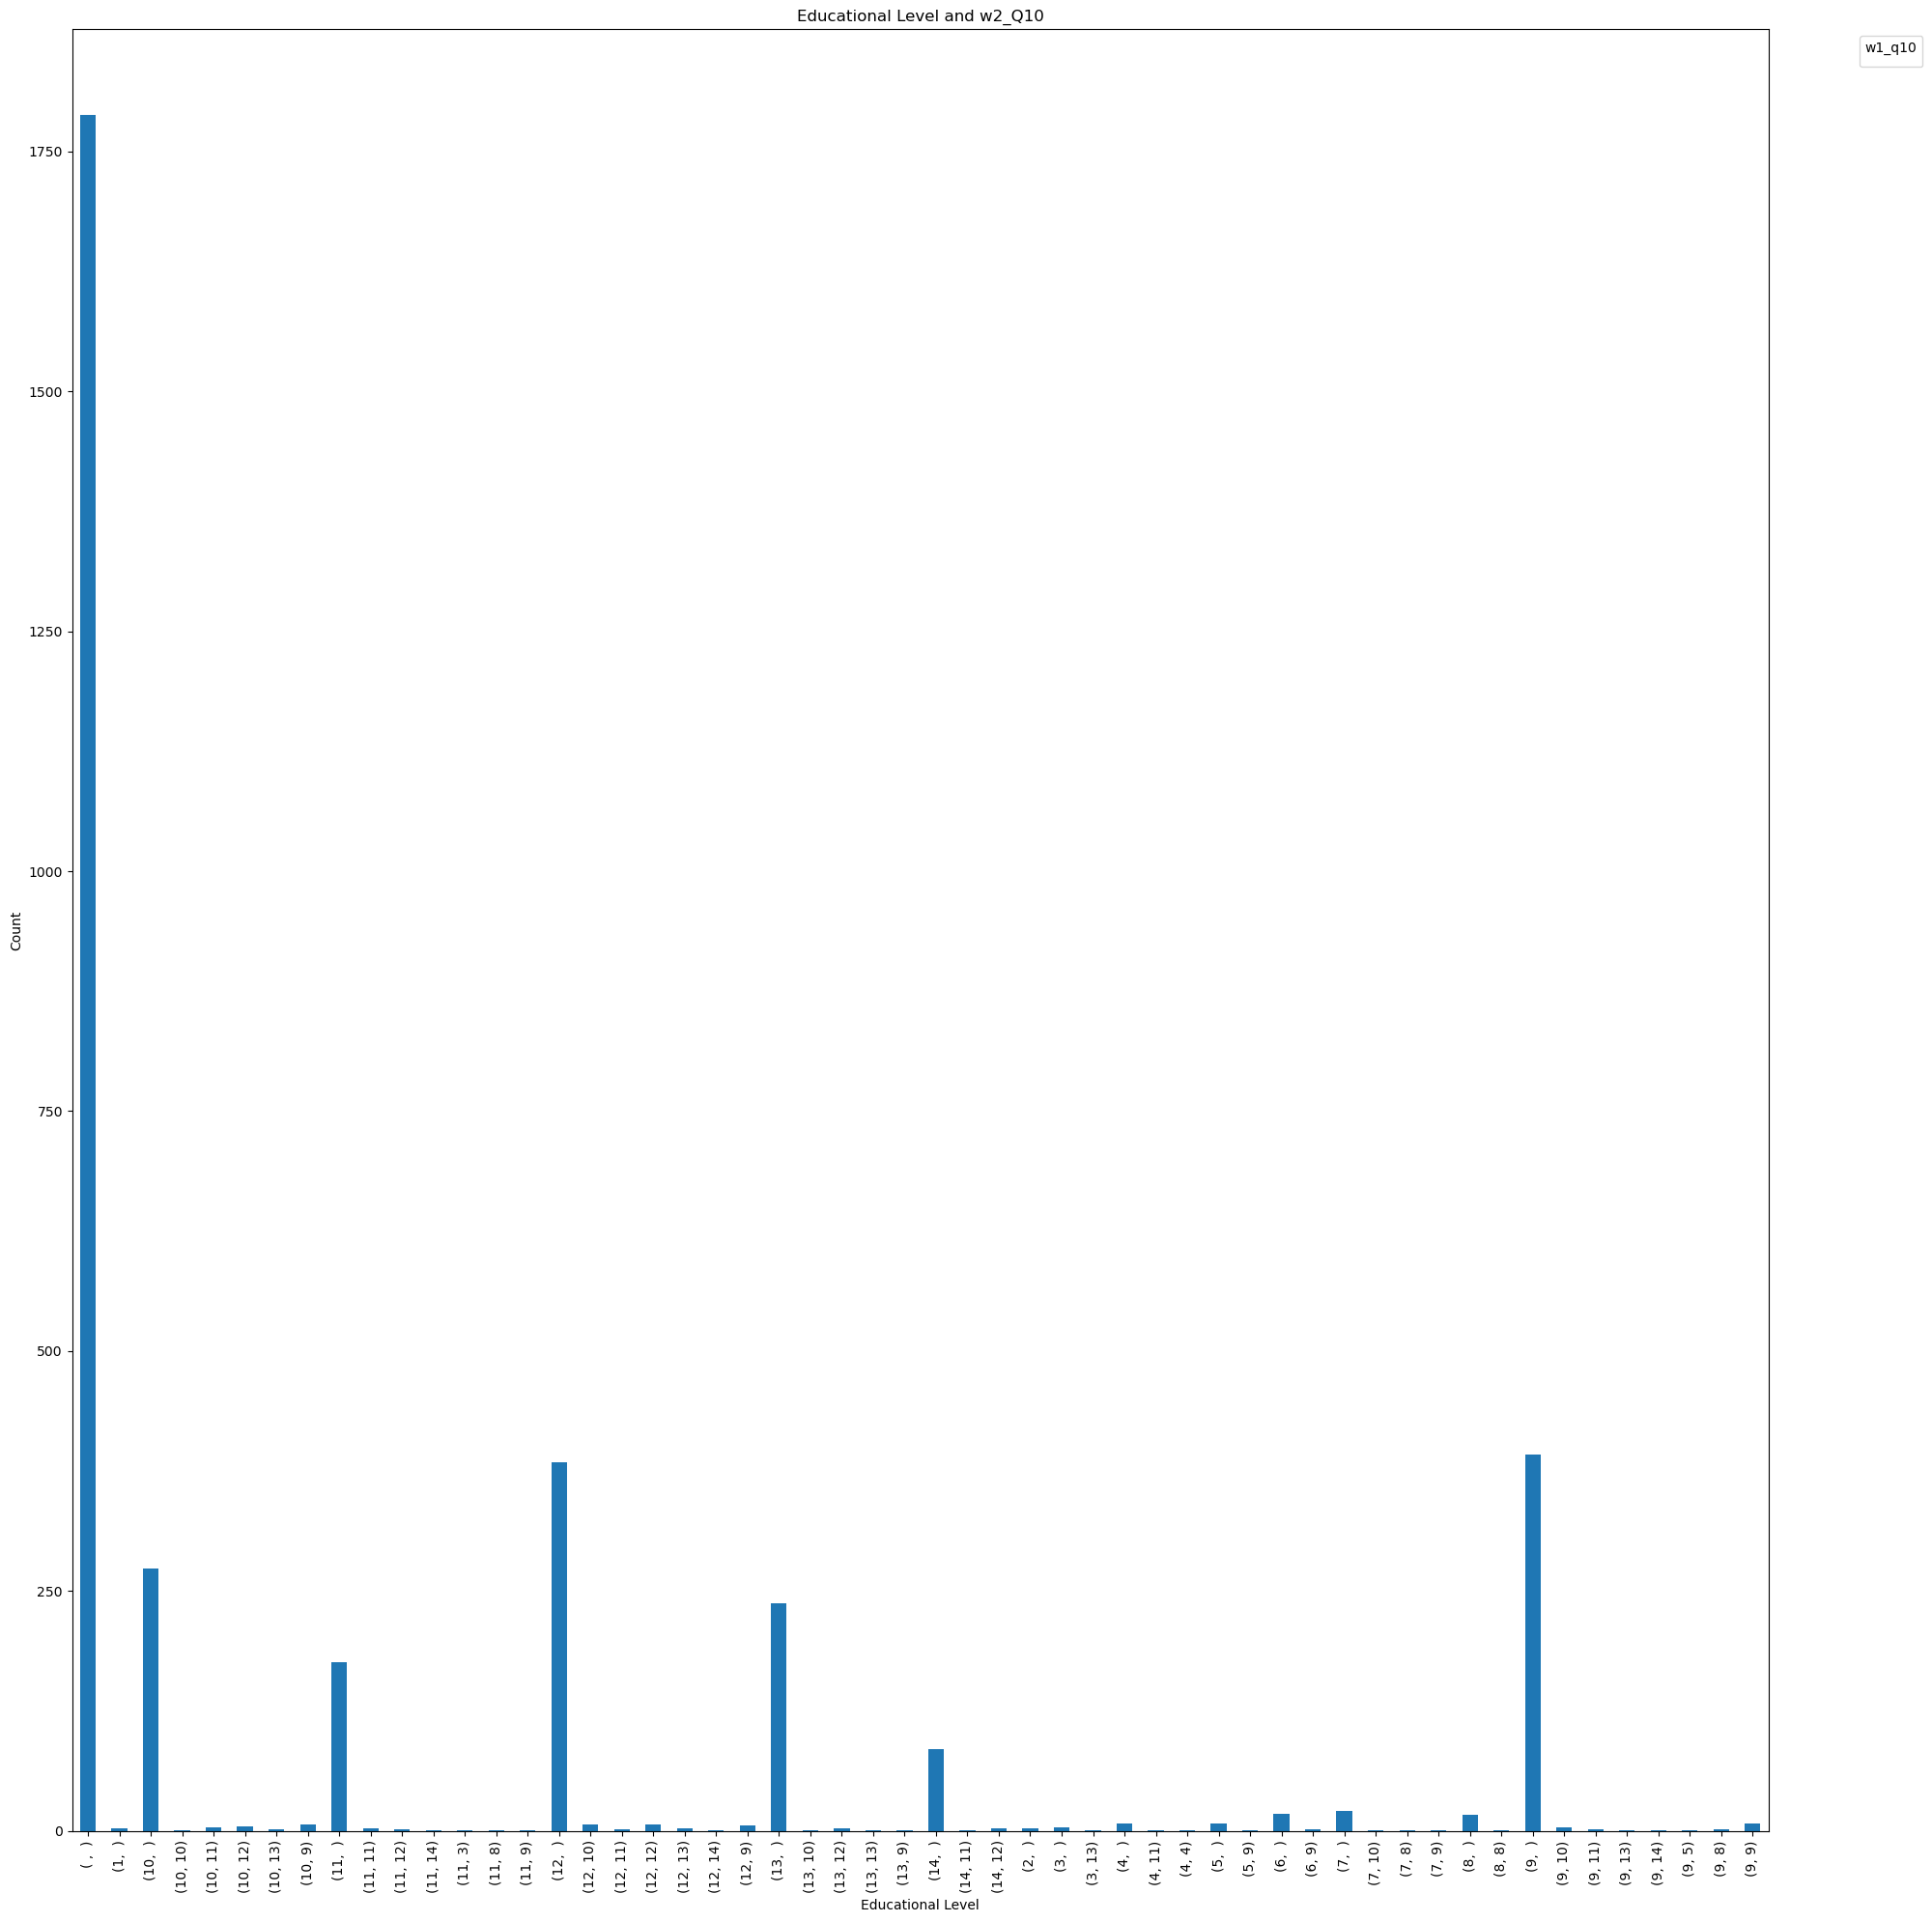

In [61]:
#to prove: more educated online daters are less likely to contact less educated people 
#we proved using this that majority of people having at least a high school degree went for people with equal or higher educational 
#level compared to them 

#group by their educational level and their partner's educational level in wave 3
educational_level = dd.groupby(['w3_ppeduc','w3_Q10']).size()
#print(educational_level)

#display results where count is greater than 50 to know if a greater proportion of people support the hypothesis
filtered_groups = educational_level[educational_level > 50]
#print(filtered_groups)

educational_level.to_csv('education_wave3.csv')

plt.figure(figsize=(20, 20))
educational_level.plot(kind='bar', stacked=True)
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.title('Educational Level and w2_Q10')
plt.legend(title='w1_q10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#not considering this since there is a lot of empty responses 



In [131]:
#hypothesis: women prefer more educated men than them 
#person's gender=woman, their eduction, their partner's gender, their education 
#filter them in such a way that the results produce that their partner's education is more than them 
#if more count found, hypothesis proved 
#WAVE1

import pandas as pd
import matplotlib.pyplot as plt


file="datingdataset.csv"

df= pd.read_csv(file)

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

married_adults1 = df['w1_partnership_status']==1
partnered_adults1 = df['w1_partnership_status']==2

filter_by_women= df['w1_ppgender']==2 
filter_by_partner_men = df['w1_q4']==1
filter_by_partner_education = df['w1_q10'] >= df['w1_ppeduc']  
#filter_by_partner_education_1 = df['w1_q10'] < df['w1_ppeduc']  #women whose partners' education is less than them - 575

filter_by_women_married_or_partnered = filter_by_women & (married_adults1 | partnered_adults1)

condition = (married_adults1 | partnered_adults1) & filter_by_women & filter_by_partner_men & filter_by_partner_education 
columns_to_print = ['caseid_new', 'w1_ppgender', 'w1_ppeduc', 'w1_q4', 'w1_q10']

print_columns_number_women = df.loc[filter_by_women_married_or_partnered,columns_to_print] #there are 1764 women in total 
print("Total number of women who are married/partnered in the survey Wave 1")
print(len(print_columns_number_women))
print("####################################")
print_columns = df.loc[condition,columns_to_print] #out of these, 1147 women have partner's whose education is greater than them 
#print(print_columns)
count_all = len(print_columns)
print("Number of women (married/partnered) whose partner's education is greater or equal to them is")
print(count_all)

Total number of women who are married/partnered in the survey Wave 1
1444
####################################
Number of women (married/partnered) whose partner's education is greater or equal to them is
919


In [79]:
#probelm: women prefer more educated men than them 
#person's gender=woman, their eduction, their partner's gender, their education 
#filter them in such a way that the results produce that their partner's education is more than them 
#if more count found, hypothesis proved 
#WAVE2 

import pandas as pd
import matplotlib.pyplot as plt


file="datingdataset.csv"

df= pd.read_csv(file)

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

filter_by_women= df['w2_ppgender']==2 
filter_by_partner_education = df['w2_Q10'] >= df['w2_ppeduc']  
#filter_by_partner_education_1 = df['w1_q10'] < df['w1_ppeduc']  #women whose partners' education is less than them - 575

#condition: has to be a woman and their partner's education has to be more than them 
condition = filter_by_women & 
columns_to_print = ['caseid_new', 'w2_ppgender', 'w2_ppeduc', 'w2_Q4', 'w2_Q10']

print_columns_number_women = df.loc[filter_by_women,columns_to_print] 
print(print_columns_number_women)
print("Total number of women in the survey Wave 2")
print(len(print_columns_number_women))
print("####################################")

print_columns = df.loc[condition,columns_to_print] 
print(print_columns)
count_all = len(print_columns)
print("Number of women whose partner's education is greater or equal to them is")
print(count_all)





      caseid_new  w2_ppgender  w2_ppeduc  w2_Q4  w2_Q10
0          53001          2.0        9.0    1.0    13.0
1          71609          2.0       10.0    NaN     NaN
6         185779          2.0       10.0    NaN     NaN
7         212249          2.0        9.0    NaN     NaN
8         214227          2.0        9.0    NaN     NaN
...          ...          ...        ...    ...     ...
3468     2962607          2.0       13.0    NaN     NaN
3470     2963249          2.0        6.0    NaN     NaN
3477     2964135          2.0       12.0    1.0    11.0
3486     2964987          2.0       11.0    NaN     NaN
3490     2965615          2.0       12.0    NaN     NaN

[976 rows x 5 columns]
Total number of women in the survey Wave 2
976
####################################
      caseid_new  w2_ppgender  w2_ppeduc  w2_Q4  w2_Q10
0          53001          2.0        9.0    1.0    13.0
68        694725          2.0       12.0    1.0    13.0
79        710045          2.0        5.0    1.0     

In [48]:
#probelm: women prefer more educated men than them 
#person's gender=woman, their eduction, their partner's gender, their education 
#filter them in such a way that the results produce that their partner's education is more than them 
#if more count found, hypothesis proved 
#WAVE3 

import pandas as pd
import matplotlib.pyplot as plt


file="datingdataset.csv"

df= pd.read_csv(file)

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

filter_by_women= df['w3_ppgender']==2 
filter_by_partner_education = df['w3_Q10'] >= df['w3_ppeduc']  
#filter_by_partner_education_1 = df['w1_q10'] < df['w1_ppeduc']

#condition: has to be a woman and their partner's education has to be more than them 
condition = filter_by_women & filter_by_partner_education 
columns_to_print = ['caseid_new', 'w3_ppgender', 'w3_ppeduc', 'w3_Q4', 'w3_Q10']

print_columns_number_women = df.loc[filter_by_women,columns_to_print] 
print(print_columns_number_women)
print("Total number of women in the survey Wave 3")
print(len(print_columns_number_women))
print("####################################")

print_columns = df.loc[condition,columns_to_print] 
print(print_columns)
count_all = len(print_columns)
print("Number of women whose partner's education is greater or equal to them is")
print(count_all)

#not considering this, a lot of NaN values 





      caseid_new  w3_ppgender  w3_ppeduc  w3_Q4  w3_Q10
0          53001          2.0        9.0    NaN     NaN
1          71609          2.0       10.0    NaN     NaN
6         185779          2.0       10.0    NaN     NaN
7         212249          2.0        9.0    NaN     NaN
8         214227          2.0        9.0    NaN     NaN
...          ...          ...        ...    ...     ...
3462     2961537          2.0        9.0    NaN     NaN
3463     2962095          2.0       14.0    NaN     NaN
3464     2962195          2.0       12.0    NaN     NaN
3486     2964987          2.0       11.0    NaN     NaN
3490     2965615          2.0       12.0    NaN     NaN

[773 rows x 5 columns]
Total number of women in the survey Wave 3
773
####################################
      caseid_new  w3_ppgender  w3_ppeduc  w3_Q4  w3_Q10
23        585169          2.0       10.0    1.0    12.0
68        694725          2.0       12.0    1.0    12.0
83        716833          2.0        4.0    1.0     

In [64]:
#hypothesis: men tend to avoid highly educated females 
#result: not a big difference
#Wave 1

import pandas as pd
import matplotlib.pyplot as plt

file="datingdataset.csv"

df= pd.read_csv(file)

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

filter_by_men = df['w1_ppgender']==1
filter_by_partner_women = df['w1_q4']==2
filter_by_partner_education_more = df['w1_q10'] >= df['w1_ppeduc']
filter_by_partner_education_less = df['w1_q10'] <= df['w1_ppeduc']

cond_more= filter_by_men & filter_by_partner_women & filter_by_partner_education_more
cond_less = filter_by_men & filter_by_partner_women & filter_by_partner_education_less

columns_to_print = ['caseid_new', 'w1_ppgender', 'w1_ppeduc', 'w1_q4', 'w1_q10']

print("Number of men wave 1")
print_result_number_men = df.loc[filter_by_men,columns_to_print]
print_result_number_men.to_csv("men.csv")
print(len(filter_by_men))
print("####################")
print("Number of men with female partners whose education is more than them")
print_result_more = df.loc[cond_more,columns_to_print]
print(print_result_more)
print(len(print_result_more))
print("#######################")
print("Education of female partners is less than them")
print_result_less = df.loc[cond_less,columns_to_print]
print(print_result_less)
print(len(print_result_less))
print("#######################")
print(df.loc[cond,columns_to_print])


Number of men wave 1
3510
####################
Number of men with female partners whose education is more than them
      caseid_new  w1_ppgender  w1_ppeduc  w1_q4  w1_q10
3         121759            1          9    2.0    13.0
4         158083            1         10    2.0    11.0
5         164061            1         10    2.0    12.0
24        587121            1          9    2.0     9.0
32        616985            1          9    2.0    11.0
...          ...          ...        ...    ...     ...
3480     2964671            1         10    2.0    12.0
3482     2964867            1          7    2.0     9.0
3489     2965507            1          9    2.0    13.0
3499     2966931            1          9    2.0    13.0
3500     2967063            1          7    2.0     9.0

[993 rows x 5 columns]
993
#######################
Education of female partners is less than them
      caseid_new  w1_ppgender  w1_ppeduc  w1_q4  w1_q10
2         106983            1         11    2.0    10.0
9

In [66]:
#hypothesis: men tend to avoid highly educated females 
#result: not a big difference
#Wave 2 - NOT CONSIDERING LOTS OF NAN VALUES 

import pandas as pd
import matplotlib.pyplot as plt

file="datingdataset.csv"

df= pd.read_csv(file)

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

filter_by_men = df['w2_ppgender']==1
filter_by_partner_women = df['w2_Q4']==2
filter_by_partner_education_more = df['w2_Q10'] >= df['w2_ppeduc']
filter_by_partner_education_less = df['w2_Q10'] <= df['w2_ppeduc']

cond_more= filter_by_men & filter_by_partner_women & filter_by_partner_education_more
cond_less = filter_by_men & filter_by_partner_women & filter_by_partner_education_less

columns_to_print = ['caseid_new', 'w2_ppgender', 'w2_ppeduc', 'w2_Q4', 'w2_Q10']

print("Number of men wave 1")
print_result_number_men = df.loc[filter_by_men,columns_to_print]
print_result_number_men.to_csv("men.csv")
print(len(filter_by_men))
print("####################")
print("Number of men with female partners whose education is more than them")
print_result_more = df.loc[cond_more,columns_to_print]
print(print_result_more)
print(len(print_result_more))
print("#######################")
print("Education of female partners is less than them")
print_result_less = df.loc[cond_less,columns_to_print]
print(print_result_less)
print(len(print_result_less))
print("#######################")
print(df.loc[cond,columns_to_print])


Number of men wave 1
3510
####################
Number of men with female partners whose education is more than them
      caseid_new  w2_ppgender  w2_ppeduc  w2_Q4  w2_Q10
56        652049          1.0        9.0    2.0     9.0
65        663969          1.0       12.0    2.0    12.0
384      1242503          1.0       12.0    2.0    13.0
451      1342665          1.0       10.0    2.0    10.0
622      1592085          1.0       12.0    2.0    14.0
678      1669187          1.0        9.0    2.0     9.0
910      1840651          1.0       12.0    2.0    12.0
1229     1981549          1.0       12.0    2.0    12.0
1336     2046249          1.0       10.0    2.0    11.0
1572     2180629          1.0        9.0    2.0    12.0
1629     2218423          1.0       10.0    2.0    10.0
1635     2219805          1.0       12.0    2.0    12.0
1740     2275771          1.0       10.0    2.0    12.0
1860     2330201          1.0       12.0    2.0    12.0
1926     2349527          1.0       12.0    

In [82]:
#hypothesis: older females likely to date men who have lesser educational level as them, based on the paper, most of the relationships are heterosexual 
#result: out of 1746 women, only 150 women dated men who had lesser educational level as them 
#status: not proven

import pandas as pd
import matplotlib.pyplot as plt

file="datingdataset.csv"

df= pd.read_csv(file)

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

filter_by_female = df['w1_ppgender']==2 #person is female
filter_by_gender_partner = df['w1_q4'] == 1 #partner is male
filter_by_education_partner = df['w1_q10'] < df['w1_ppeduc']
filter_by_age_both = df['w1_ppage'] > df['w1_q9']

#362 females are older than their male partners 
cond = filter_by_female & filter_by_gender_partner & filter_by_age_both & filter_by_education_partner

columns_to_print = ['caseid_new', 'w1_ppgender', 'w1_ppeduc', 'w1_ppage', 'w1_q4','w1_q10', 'w1_q9']

print("Total number of women")
print(df.loc[filter_by_female,columns_to_print]) #1746 total women

print_cond = df.loc[cond,columns_to_print]
print(print_cond)
print(len(print_cond))

Total number of women
      caseid_new  w1_ppgender  w1_ppeduc  w1_ppage  w1_q4  w1_q10  w1_q9
0          53001            2          9        48    1.0    11.0   46.0
1          71609            2         10        68    1.0    10.0   71.0
6         185779            2         10        72    1.0    10.0   75.0
7         212249            2          9        55    1.0    10.0   55.0
8         214227            2          9        73    1.0     9.0   79.0
...          ...          ...        ...       ...    ...     ...    ...
3505     2967957            2          9        30    1.0     9.0   30.0
3506     2968357            2         10        42    2.0     9.0   44.0
3507     2968971            2          9        23    1.0     9.0   23.0
3508     2969933            2         12        34    2.0    10.0   33.0
3509     2972135            2          9        21    2.0     7.0   16.0

[1764 rows x 7 columns]
      caseid_new  w1_ppgender  w1_ppeduc  w1_ppage  w1_q4  w1_q10  w1_q9
25  

In [55]:
#hypothesis: more educated daters are less likely to contact less educated people 
#we proved using this that majority of people having at least a high school degree went for people with equal or higher educational 
#level compared to them using stats from wave 1

married_adults = df['w1_partnership_status']==1
partnered_adults = df['w1_partnership_status']==2

w1_section_partnered = df['w1_section']==1

p_educ_greater_resp = df['w1_q10']>=df['w1_ppeduc']

#cond = (married_adults | partnered_adults) 
cond = w1_section_partnered & p_educ_greater_resp

columns_to_print=['caseid_new','w1_ppeduc','w1_q10']
case_ids_w1 = ['caseid_new']

case_ids_cond =df.loc[cond,case_ids_w1]

caseids1 = case_ids_cond['caseid_new'].tolist()

print("Number of couples who are married/partnered and whose partner's educational level > theirs:",len(caseids1))
#print(caseids)

Number of couples who are married/partnered and whose partner's educational level > theirs: 1941


In [56]:
married_adults_samep = df['w2_section']==1
partnered_adults_samep = df['w2_section']==3
no_longer_married = df['w2_section']==2
no_longer_partnered = df['w2_section']==4
new_partnership_status = df['w2_section']==5
not_partnered = df['w2_section']==6

p_educ_greater_resp = df['w2_Q10']>df['w2_ppeduc']

cond = (married_adults_samep| partnered_adults_samep )&p_educ_greater_resp

#married or partnered with the same adult 
cond_together = married_adults_samep | partnered_adults_samep
#print(len(df.loc[cond_together]))

columns_to_print=['caseid_new','w2_ppeduc','w2_Q10']
case_ids = ['caseid_new']

caseids_cond=df.loc[cond_together,case_ids]

caseids2 = caseids_cond['caseid_new'].tolist()

print("Number of couples married/partnered to the same people:",len(case_ids_list))
#print(case_ids_list)

Number of couples married/partnered to the same people: 1488


In [57]:
#wave3, married and partnered to the same partner 
married_adults_samep = df['w3_section']==1
partnered_adults_samep = df['w3_section']==3
no_longer_married = df['w3_section']==2
no_longer_partnered = df['w3_section']==4
new_partnership_status = df['w3_section']==5
not_partnered = df['w3_section']==6

p_educ_greater_resp = df['w3_Q10']>df['w3_ppeduc']

cond = (married_adults_samep| partnered_adults_samep )

columns_to_print=['caseid_new','w3_ppeduc','w3_Q10']
case_ids = ['caseid_new']

caseids_cond=df.loc[cond,case_ids]

caseids3 = caseids_cond['caseid_new'].tolist()

print("Number of couples married/partnered to the same people:",len(case_ids_list3))
#print(case_ids_list)

Number of couples married/partnered to the same people: 1243


In [59]:
import numpy as np

print("Number of couples who are married/partnered and whose partner's educational level >= theirs (wave1):",len(caseids1))
print("Number of couples married/partnered to the same people (wave2):",len(caseids2))
print("Number of couples married/partnered to the same people (wave3):",len(caseids3))

common_elements_1_2 = np.intersect1d(caseids1,caseids2)
print("Number of couples married/partnered to the same people (1096) across all waves whose partner's education is more than them:",
      len(np.intersect1d(common_elements_1_2,caseids3)))

print(common_elements_1_2,caseids3)

#around 997 couples, partner's education more than them

Number of couples who are married/partnered and whose partner's educational level >= theirs (wave1): 1941
Number of couples married/partnered to the same people (wave2): 1488
Number of couples married/partnered to the same people (wave3): 1243
Number of couples married/partnered to the same people (1096) across all waves whose partner's education is more than them: 736
[  71609  121759  164061  212249  214227  369975  428211  507747  516823
  582849  616985  621641  637531  643423  643505  646023  648619  648669
  650237  651259  653633  657869  659217  662355  694739  698117  703017
  704661  705457  709075  709173  716931  724199  726183  727775  730391
  731629  734689  744235  750887  755761  765797  769207  774843  775045
  782789  783399  783679  784141  799683  806423  808133  810569  811175
  813467  822315  842437  844865  846827  847729  854869  855367  859445
  861113  867449  867567  868743  874193  876181  894473  903051  908663
  948417  959621  964713  981251  981685  98

In [54]:
married_adults1 = df['w1_partnership_status']==1
partnered_adults1 = df['w1_partnership_status']==2

married_adults_samep2 = df['w2_section']==1
partnered_adults_samep2 = df['w2_section']==3

married_adults_samep3 = df['w3_section']==1
partnered_adults_samep3 = df['w3_section']==3

p_educ_greater_resp = df['w1_q10']>=df['w1_ppeduc']
caseids = ['caseid_new']

cond = (married_adults1 | partnered_adults1) & (married_adults_samep2 | partnered_adults_samep2) & (married_adults_samep3 | partnered_adults_samep3) & p_educ_greater_resp

records = df.loc[cond,caseids]
print(len(records))



736


In [91]:
#test
caseid=53001

columns_to_print=['caseid_new','w1_ppeduc','w1_q10','w2_ppeduc','w2_Q10', 'w1_section','w2_section']
col = df[df['caseid_new']==caseid]

df.loc[df['caseid_new'] == caseid,columns_to_print ]

,caseid_new,w1_ppeduc,w1_q10,w2_ppeduc,w2_Q10,w1_section,w2_section
0,53001,9,11.0,9.0,13.0,1,2.0


In [32]:
#not together wave 2

cond_no_longer =  no_longer_married | no_longer_partnered | new_partnership_status | not_partnered
print(len(df.loc[cond_no_longer]))

619
